### 딥-러닝 과정 CNN | 2020.02.27. 

### 네번째 실습. Keras 모델 생성/학습 - cifar10 : CNN
[Keras Dataset](https://keras.io/ko/datasets/#-cifar10)

In [1]:
# 1. 데이터 불러오기
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

Using TensorFlow backend.


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [2]:
# 2. 이미지 데이터 확인하기 🖼
import matplotlib.pyplot as plt

print(plt.imshow(x_train[1]))
print(y_train[1])

AxesImage(80,52.8;496x369.6)
[9]


In [3]:
# 3. 이미지 데이터 전처리 
x_train_re = x_train / 255.0
x_test_re = x_test / 255.0

print(x_train_re[:5])

[[[[0.23137255 0.24313725 0.24705882]
   [0.16862745 0.18039216 0.17647059]
   [0.19607843 0.18823529 0.16862745]
   ...
   [0.61960784 0.51764706 0.42352941]
   [0.59607843 0.49019608 0.4       ]
   [0.58039216 0.48627451 0.40392157]]

  [[0.0627451  0.07843137 0.07843137]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509804 0.21568627]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117647 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215686 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941176 0.19607843]
   [0.47058824 0.32941176 0.19607843]
   [0.42745098 0.28627451 0.16470588]]

  ...

  [[0.81568627 0.66666667 0.37647059]
   [0.78823529 0.6        0.13333333]
   [0.77647059 0.63137255 0.10196078]
   ...
   [0.62745098 0.52156863 0.2745098 ]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333333 0.07843137]]

  [[0.70588235 0.54509804 0.37647059]
   [0.6

In [4]:
# 4. Label categorical (one-hot encoding) 
from keras.utils import to_categorical

y_train_en = to_categorical(y_train)
y_test_en = to_categorical(y_test)

print(y_train_en[:5])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [14]:
print(y_train_en.shape)

(50000, 10)


In [23]:
# 5. 모델 생성 : CNN
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape = (32,32,3), padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape = (32,32,3), padding = 'same', activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation='softmax'))

print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 32)                262176    
_________________________________________________________________
dense_18 (Dense)             (None, 16)               

In [24]:
# 6. Compile - Optimizer, Loss function 설정
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
# 7. 모델 학습시키기
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience = 3)
history = model.fit(x_train_re, y_train_en, nb_epoch = 30, batch_size=16, validation_split=0.2, callbacks=[early_stop])

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
  448/40000 [..............................] - ETA: 15s - loss: 0.3948 - accuracy: 0.8661

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


40000/40000 [==============================] - 18s 438us/step - loss: 0.4457 - accuracy: 0.8562 - val_loss: 1.2685 - val_accuracy: 0.6628
Epoch 2/30
40000/40000 [==============================] - 18s 438us/step - loss: 0.4405 - accuracy: 0.8571 - val_loss: 1.3096 - val_accuracy: 0.6676
Epoch 3/30
40000/40000 [==============================] - 17s 437us/step - loss: 0.4365 - accuracy: 0.8619 - val_loss: 1.3205 - val_accuracy: 0.6553
Epoch 4/30
40000/40000 [==============================] - 18s 438us/step - loss: 0.4280 - accuracy: 0.8629 - val_loss: 1.3602 - val_accuracy: 0.6587


In [26]:
# 8. 모델 평가하기
train_acc = model.evaluate(x_train_re, y_train_en)
test_acc = model.evaluate(x_test_re, y_test_en)

print(train_acc)
print(test_acc)

10000/10000 [==============================] - 1s 100us/step
[0.7854126601314545, 0.7313399910926819]
[1.1017856935501098, 0.635200023651123]


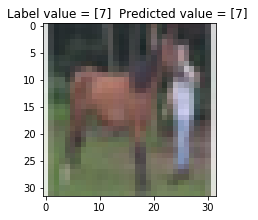

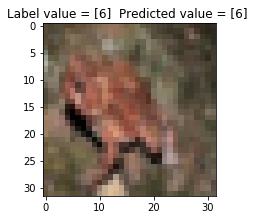

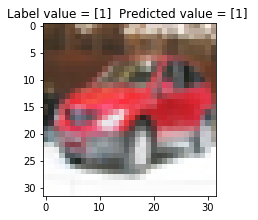

In [27]:
# 9. 이미지를 랜덤으로 선택해 훈련된 모델로 예측 🖼
import numpy
for index in numpy.random.choice(len(y_test_en), 3, replace = False):
    predicted = model.predict(x_test_re[index:index + 1])[0]
    label = y_test_en[index]
    result_label = numpy.where(label == numpy.amax(label))
    result_predicted = numpy.where(predicted == numpy.amax(predicted))
    title = "Label value = %s  Predicted value = %s " % (result_label[0], result_predicted[0])
    
    fig = plt.figure(1, figsize = (3,3))
    ax1 = fig.add_axes((0,0,.8,.8))
    ax1.set_title(title)
    images = x_test_re
    plt.imshow(images[index].reshape(32, 32,3), cmap = 'Greys', interpolation = 'nearest')
    plt.show()

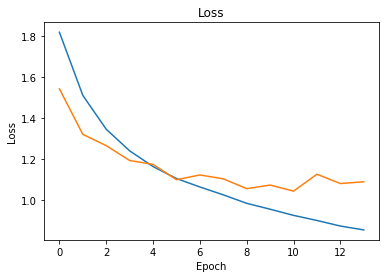

In [28]:
# 10. 학습 시각화하기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

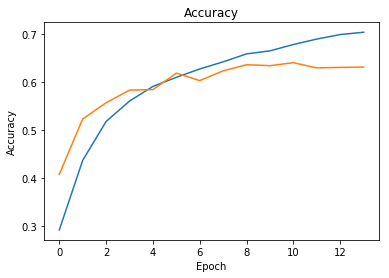

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

수고하셨습니다 👍